### Load Packages 

import pandas as pd
import numpy as np
import urllib.request, json 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

### Load data 

In [74]:
q1= pd.read_csv('waqi-covid19-airqualitydata-2019Q1.csv',skiprows=[0,1,2,3])
q1.head()

data20= pd.read_csv('waqi-covid19-airqualitydata-2020.csv',skiprows=[0,1,2,3])
data20.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-03-08,AE,Abu Dhabi,dew,186,-1.0,19.0,15.0,359.63
1,2020-03-09,AE,Abu Dhabi,dew,192,9.0,19.0,15.0,40.73
2,2020-03-22,AE,Abu Dhabi,dew,190,16.0,21.5,19.0,11.82
3,2020-04-07,AE,Abu Dhabi,dew,158,7.0,19.0,15.0,53.93
4,2020-04-11,AE,Abu Dhabi,dew,192,2.0,19.0,6.0,181.78


### data exploratory

In [6]:
data20.Country.unique()

array(['AE', 'AT', 'EE', 'FR', 'KG', 'SK', 'CL', 'DE', 'PH', 'UA', 'UZ',
       'IE', 'IL', 'PK', 'PL', 'CO', 'ML', 'BO', 'FI', 'GT', 'SG', 'SV',
       'TW', 'BG', 'CH', 'IQ', 'KW', 'MK', 'NZ', 'SE', 'NP', 'RE', 'UG',
       'LT', 'BA', 'BR', 'CA', 'CY', 'HK', 'IS', 'LA', 'MN', 'KR', 'AR',
       'BD', 'CI', 'CR', 'CZ', 'EC', 'ES', 'MX', 'GB', 'GH', 'IR', 'IT',
       'PT', 'TJ', 'TR', 'AF', 'ET', 'GR', 'ID', 'JO', 'LK', 'TM', 'AU',
       'BH', 'CN', 'RU', 'NL', 'ZA', 'XK', 'GN', 'JP', 'KZ', 'MY', 'PE',
       'RO', 'SA', 'US', 'BE', 'CW', 'DK', 'DZ', 'MO', 'NO', 'RS', 'VN',
       'GE', 'HR', 'HU', 'IN', 'MM', 'PR', 'TH'], dtype=object)

In [23]:
china= data20[data20['Country']=='CN']
china.City.unique()

array(['Beijing', 'Jieyang', 'Kunming', 'Hangzhou', 'Chongqing',
       'Qingdao', 'Haikou', 'Ürümqi', 'Qiqihar', 'Guiyang', 'Shenzhen',
       'Yunfu', 'Xuchang', 'Yinchuan', 'Shenyang', 'Lhasa', 'Shanghai',
       'Changchun', 'Foshan', 'Nanning', 'Fushun', 'Hefei', 'Chengdu',
       'Hohhot', 'Qinhuangdao', 'Shijiazhuang', 'Shantou', 'Zhengzhou',
       'Nanjing', 'Xining', 'Xi’an', 'Zhuzhou', 'Wuhan', 'Tianjin',
       'Changzhou', 'Nanchang', 'Shiyan', 'Xinxiang', 'Suzhou', 'Harbin',
       'Lanzhou', 'Jinan', 'Changsha', 'Hegang', 'Anyang', 'Wuxi',
       'Taiyuan', 'Guangzhou', 'Fuzhou', 'Ningbo', 'Xiamen', 'Dongguan'],
      dtype=object)

### Start to create graph 

In [25]:
#extract main cities in china
main=['Beijing','Shanghai','Hangzhou','Nanjing','Shenzhen','Chengdu']

In [67]:
main_city = china[china['City'].isin(main)]

In [69]:
#group by city and median
main_city = main_city.groupby(['City'])[['median']].mean().reset_index()
main_city.head()

,City,median
0,Beijing,93.606795
1,Chengdu,110.385220
2,Hangzhou,107.512759
3,Nanjing,108.093265
4,Shanghai,100.029573


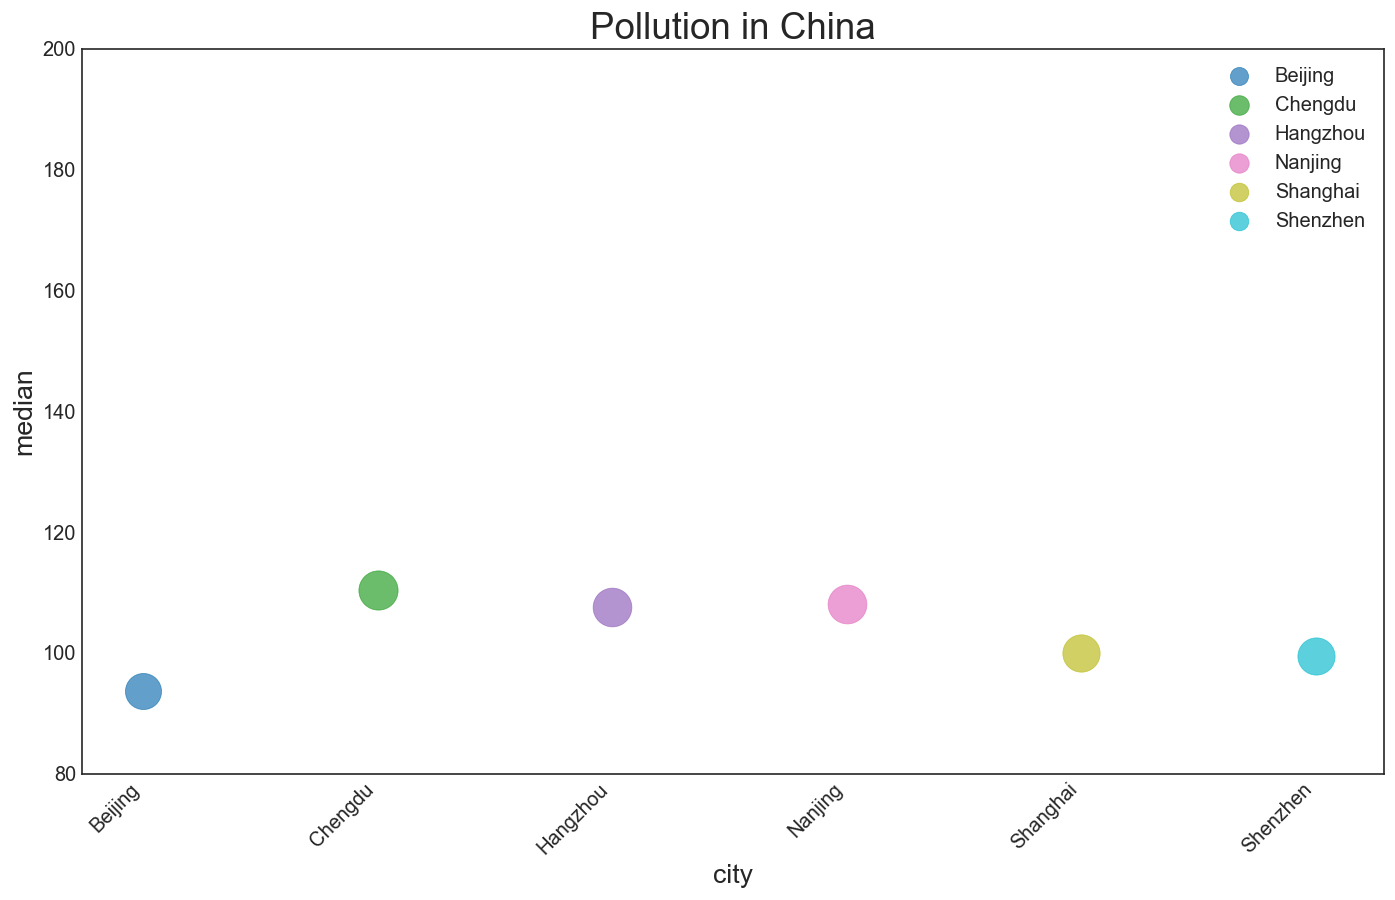

In [72]:
#start to create bubble plot for 2020 Q1 air quality in china main cities

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

%matplotlib inline

categories = np.unique(main_city['City'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

fig = plt.figure(figsize=(14,8), dpi=120, facecolor='w', edgecolor='k')    
for i, category in enumerate(categories):
    data_ = main_city.loc[main_city.City==category, :]
    data_.index = range(data_.shape[0])
    plt.scatter('City', 'median', data=data_
                , s= main_city.loc[main_city.City==category, "median"]*5
                , c=np.array(colors[i]).reshape(1,-1)
                , label=str(category)
                , edgecolors= colors[i]
                , alpha = 0.7
                , linewidths=.5
               )

plt.gca().set(ylim=(80, 200),
              xlabel='city', ylabel='median')
plt.xticks(np.unique(main_city['City']),fontsize=12,rotation=45,horizontalalignment='right')
plt.yticks(fontsize=12)
plt.title("Pollution in China", fontsize=22)
plt.legend(fontsize=12
           ,markerscale=0.5
          )
plt.show()

### Start to create graph for 2019 Q1 air quaity in China main cities

In [52]:
china_Q1= q1[q1['Country']=='CN']
china_Q1.head()

,Date,Country,City,Specie,count,min,max,median,variance
384292,2019-03-22,CN,Beijing,temperature,456,0.0,14.5,9.5,238.98
384293,2019-03-27,CN,Beijing,temperature,480,2.5,22.0,10.5,415.96
384294,2018-12-31,CN,Beijing,temperature,480,-14.0,-3.0,-9.5,151.43
384295,2019-01-22,CN,Beijing,temperature,480,-1.0,11.1,3.0,194.82
384296,2019-02-04,CN,Beijing,temperature,480,-7.5,3.0,-4.0,121.93


In [53]:
main2=['Beijing','Shanghai','Hangzhou','Nanjing','Shenzhen','Chengdu']

In [56]:
main_city_q1 = china_Q1[china_Q1['City'].isin(main2)]
main_city_q1.City.unique()

array(['Beijing', 'Hangzhou', 'Shenzhen', 'Shanghai', 'Chengdu',
       'Nanjing'], dtype=object)

In [58]:
main_city2 = main_city_q1.groupby(['City'])[['median']].mean().reset_index()
main_city2.head()

,City,median
0,Beijing,111.711069
1,Chengdu,121.590421
2,Hangzhou,148.958730
3,Nanjing,123.860431
4,Shanghai,111.303226


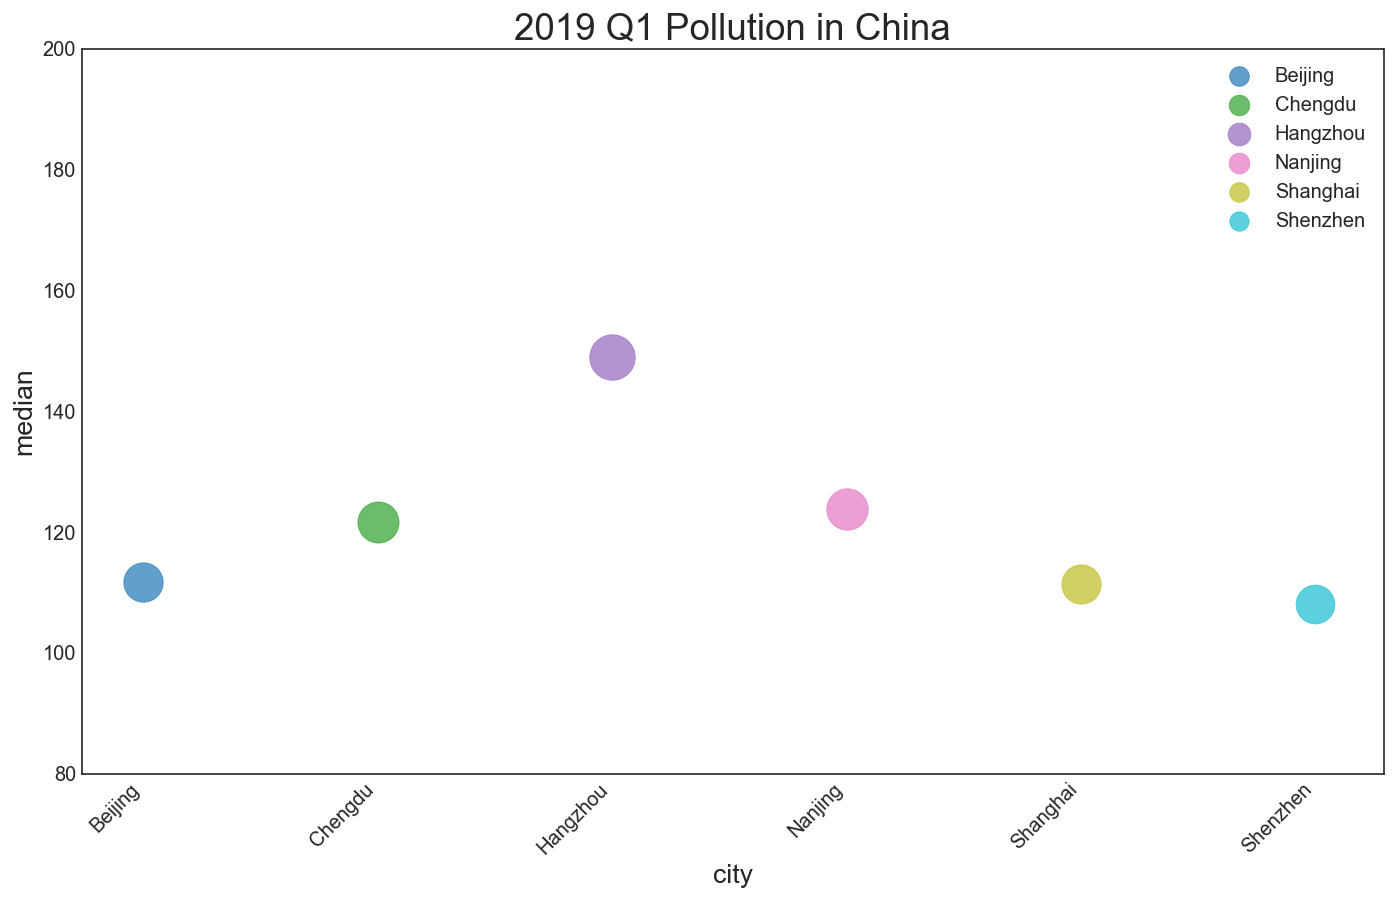

In [73]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

%matplotlib inline

categories = np.unique(main_city2['City'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

fig = plt.figure(figsize=(14,8), dpi=120, facecolor='w', edgecolor='k')    
for i, category in enumerate(categories):
    data_ = main_city2.loc[main_city2.City==category, :]
    data_.index = range(data_.shape[0])
    plt.scatter('City', 'median', data=data_
                , s= main_city2.loc[main_city2.City==category, "median"]*5
                , c=np.array(colors[i]).reshape(1,-1)
                , label=str(category)
                , edgecolors= colors[i]
                , alpha = 0.7
                , linewidths=.5
               )

plt.gca().set(ylim=(80, 200),
              xlabel='city', ylabel='median')
plt.xticks(np.unique(main_city2['City']),fontsize=12,rotation=45,horizontalalignment='right')
plt.yticks(fontsize=12)
plt.title("2019 Q1 Pollution in China", fontsize=22)
plt.legend(fontsize=12
           ,markerscale=0.5
          )
plt.show()